In [1]:
#install Kaggle
!pip install -q Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sury9466","key":"0cbc9b6cf7cbcdb92ce4b475b742a3df"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list  

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                     Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           7866        239  1.0              
devansodariya/student-performance-data                       Student Performance Dataset                           7KB  2022-05-26 13:55:09           3521        136  0.9705882        
iamsouravbanerjee/software-professional-salaries-2022        Salary Dataset - 2022                               526KB  2022-06-10 06:02:59           1322         39  1.0              
paradisejoy/top-hits-spotify-from-20002019                   Top Hits Spoti

In [7]:
! kaggle datasets download -d aungpyaeap/supermarket-sales

  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 29.2MB/s]


In [8]:
! unzip supermarket-sales.zip

Archive:  supermarket-sales.zip
  inflating: supermarket_sales - Sheet1.csv  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

Reading dataframe

In [10]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

Task 1 initial exploration

In [11]:
df.shape

(1000, 17)

In [12]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [13]:
df.set_index(df['Date'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/29/2019,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
3/2/2019,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
2/9/2019,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [14]:
df.dtypes
df['Date']= pd.to_datetime(df['Date'])
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [15]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Task 2 univariate analysis

In [16]:
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


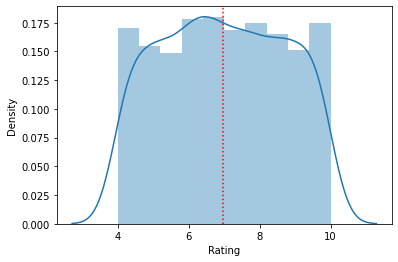

In [17]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c= 'red', ls=':')

as we can see the graph is not skewed.

 Difference between aggregatesales among branches

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


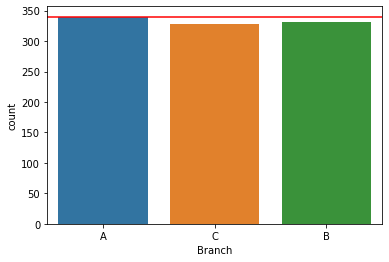

In [18]:
sns.countplot(df['Branch'])
plt.axhline(y=np.max(df['Branch'].value_counts()), c= 'red')

In [19]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

It is evident that all three branches have similar aggregate sales figures.

Count plot for payment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


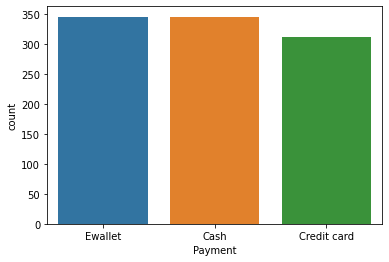

In [20]:
sns.countplot(df['Payment'])

hist plots for all variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f045cb8e550>,
      dtype=object)

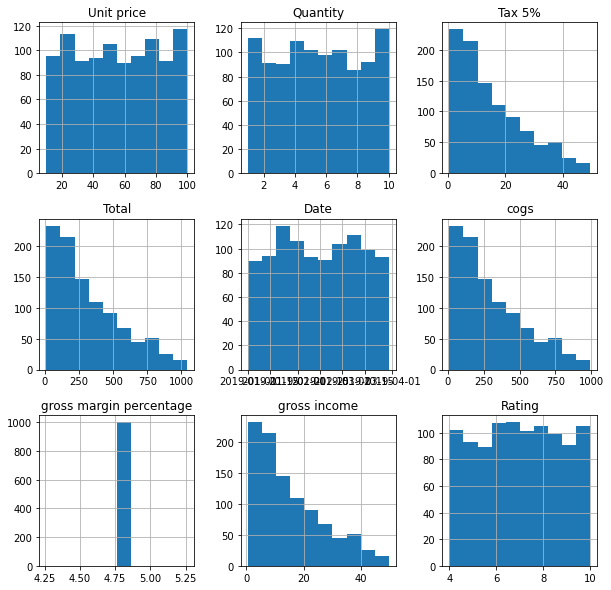

In [21]:
df.hist(figsize=(10,10))

Task 3 Bivariate analysis

relation between gross income and rating

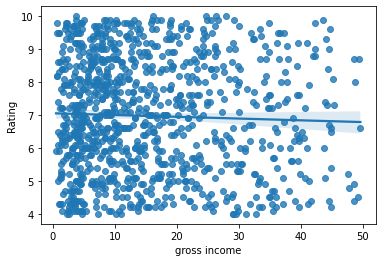

In [22]:
sns.regplot(x=df['gross income'],y=df['Rating'])

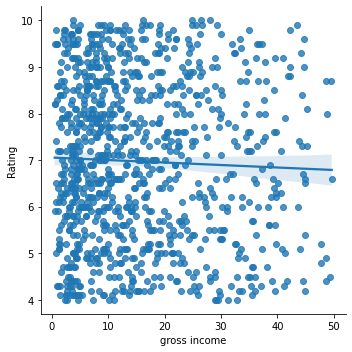

In [23]:
sns.lmplot(x='gross income',y='Rating',
           data=df)

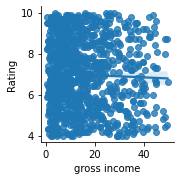

In [24]:
sns.pairplot(x_vars=['gross income'],y_vars=['Rating'],data=df,kind="reg")

As we can see the regplot is almost a straight line so there doesn't seem to be any relation between gross income and rating.

relation between gender and gross income

one hot an 

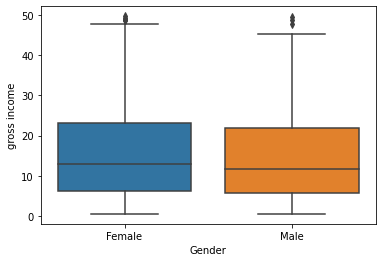

In [46]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

In [26]:
df['Gender'].describe()

count       1000
unique         2
top       Female
freq         501
Name: Gender, dtype: object

In [29]:
# g = df.Gender
# q3, q1 = np.percentile(g,[75 ,25])
# iqr = q3 - q1
# iqr
# df.describe()

There is no difference between male and female gross income figures



```
# This is formatted as code
```

time trend of gross income

here as we know our dataset is organized by date and on a particular date multiple purchases can be made from different branches therefore we need to groupby date first.

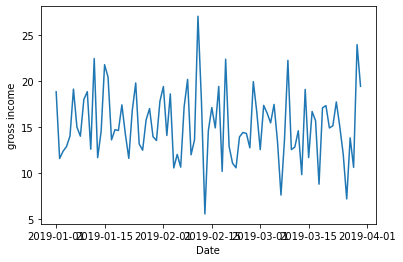

In [30]:
sns.lineplot(x=df.groupby(df['Date']).mean().index, y=df.groupby(df['Date']).mean()['gross income'])

now PFA pairplots for all combinations of available variables

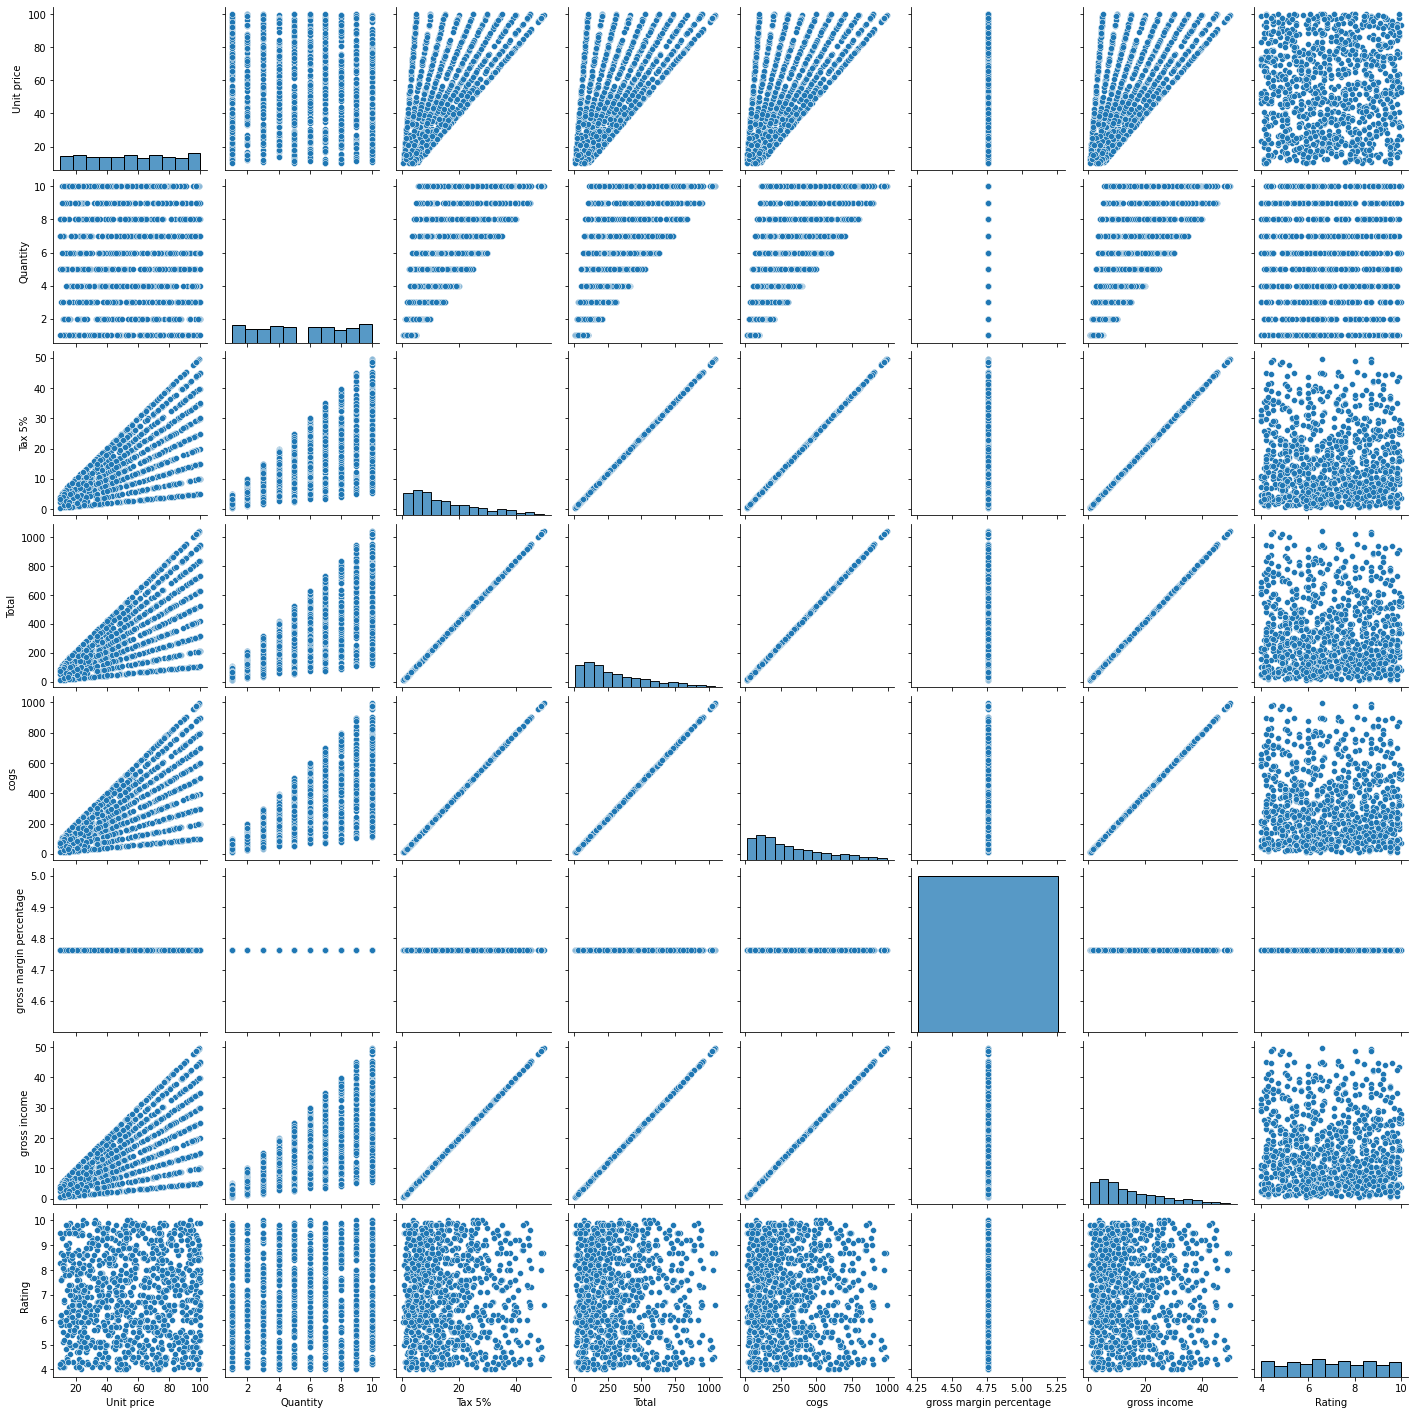

In [31]:
sns.pairplot(df)

Task 4 Handling duplicate data

In [32]:
df.set_index(df['Date'], inplace=True)
df.duplicated()
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,


there are no  duplicate rows. if there were we could use df.drop_duplicates(inplace=True).

if data is missing then we replace numerical data with mean of the column and mode when we deal with non-numerical data or strings.

In [33]:
df.isna().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

now profiling shown using pandas profiling

In [34]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 21.8 MB 140 kB/s
     |████████████████████████████████| 11.1 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 62.8 MB/s 
     |████████████████████████████████| 102 kB 54.1 MB/s 
     |████████████████████████████████| 690 kB 44.1 MB/s 
     |████████████████████████████████| 4.7 MB 36.9 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 44.0 MB/s 
     |████████████████████████████████| 38.1 MB 327 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=fff264d9f27642f6fb59c2a27991db8bf774c0319a9dab40f3706145d2a3bd28
  Stored in directory: /tmp/pip-ephem-wheel-cache-rnaycj19/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=687707174f8aaabd601cdc3404

In [35]:
#dataset = pd.read_csv('/content/supermarket_sales.csv')


#prof = ProfileReport( dataset )
#prof

Task 5  correlation analysis

In [36]:
np.corrcoef(df['gross income'], df['Rating'])[1][0]

-0.03644170499701839

In [37]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


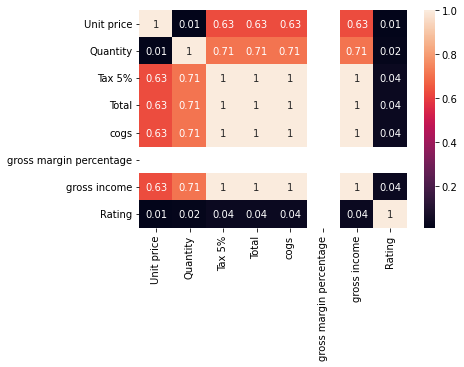

In [38]:
sns.heatmap(np.round(df.corr().abs(),2),annot=True)

In [39]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.60)]
print()
print(to_drop)
df1 = df.drop(df[to_drop], axis=1)
print()
print(df1.head())

                         Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                      NaN  0.010778  0.633962  0.633962  0.633962   
Quantity                        NaN       NaN  0.705510  0.705510  0.705510   
Tax 5%                          NaN       NaN       NaN  1.000000  1.000000   
Total                           NaN       NaN       NaN       NaN  1.000000   
cogs                            NaN       NaN       NaN       NaN       NaN   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income                    NaN       NaN       NaN       NaN       NaN   
Rating                          NaN       NaN       NaN       NaN       NaN   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962  0.008778  
Quantity                                     NaN      0.705510  0.015815  
Tax 5%                                       NaN      1.000000 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


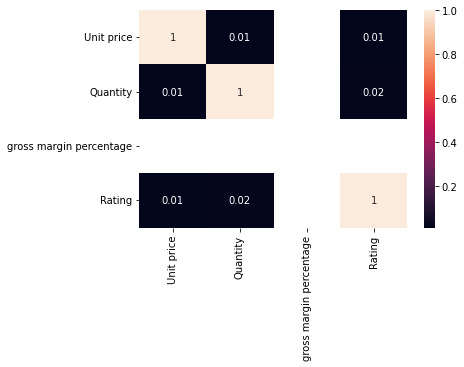

In [40]:
sns.heatmap(np.round(df1.corr().abs(),2),annot=True)

custom bananeka

individual regression with everything and then vif 

variance infalation method 

In [ ]:
# from patsy import dmatrices
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# #find design matrix for linear regression model using 'rating' as response variable 
# y, X = dmatrices('Unit price ~ Quantity+ Tax 5%+ Total +cogs + gross margin percentage + gross income + Rating ', data=df, return_type='dataframe')

# #calculate VIF for each explanatory variable
# vif = pd.DataFrame()
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['variable'] = X.columns

# #view VIF for each explanatory variable 
# vif